In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\ksushma\Practise\StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

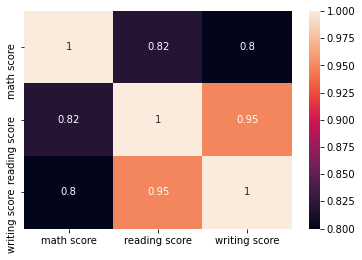

In [6]:
corr=df.corr().round(2)
#plt.figure(figsize=(15,10))
sns.heatmap(data=corr,annot=True)

In [7]:
df['total_score'] = (df['math score'] + df['reading score'] +df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [8]:
passing_marks = 40

In [9]:
df['Pass_Status'] = np.where(df['total_score']<passing_marks,'F','P')

In [10]:
def grades(Pass_Status,total_score):
    if Pass_Status == 'F':
        return 'F'
    if total_score >=90:
        return 'A+'
    if total_score >=80:
        return 'A'
    if total_score >=70:
        return 'B'
    if total_score >=60:
        return 'C'
    if total_score >=50:
        return 'D'
    if total_score >=40:
        return 'E'

In [11]:
df['Grade'] =df.apply(lambda x : grades(x['Pass_Status'] ,x['total_score']) ,axis =1)

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Pass_Status,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,P,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,P,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,P,A+
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,P,E
4,male,group C,some college,standard,none,76,78,75,76.333333,P,B


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df['gender']=le.fit_transform(df['gender']) 
df['race/ethnicity']=le.fit_transform(df['race/ethnicity']) 
df['parental level of education']=le.fit_transform(df['parental level of education']) 
df['lunch']=le.fit_transform(df['lunch']) 
df['test preparation course']=le.fit_transform(df['test preparation course']) 
df['Pass_Status']=le.fit_transform(df['Pass_Status']) 
df['Grade']=le.fit_transform(df['Grade']) 

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Pass_Status,Grade
0,0,1,1,1,1,72,72,74,72.666667,1,2
1,0,2,4,1,0,69,90,88,82.333333,1,0
2,0,1,3,1,1,90,95,93,92.666667,1,1
3,1,0,0,0,1,47,57,44,49.333333,1,5
4,1,2,4,1,1,76,78,75,76.333333,1,2


In [16]:
X=df.drop('total_score',axis=1)
Y=df[['total_score']]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, 
                                                    random_state=2)

# Linear Regression

In [18]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
x=linear_model.LinearRegression()
x.fit(X_train,y_train)

LinearRegression()

In [19]:
from sklearn.metrics import r2_score
predictions=x.predict(X_test)
accuracy=r2_score(y_test,predictions)
accuracy

1.0

In [20]:
import warnings
warnings.filterwarnings('ignore')

# Adaboost Regressor(Linear Regression)

In [21]:
from sklearn.ensemble import AdaBoostRegressor
adaBoost = AdaBoostRegressor(base_estimator=x,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(X_train, y_train)

y_pred = adaBoost.predict(X_test)

from sklearn.metrics import r2_score

accuracy=r2_score(y_test, y_pred)
accuracy

1.0

In [22]:
from sklearn.model_selection import GridSearchCV
ada=AdaBoostRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=adaBoost,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)

In [23]:
search.fit(X,Y)

GridSearchCV(estimator=AdaBoostRegressor(base_estimator=LinearRegression(),
                                         n_estimators=100),
             n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [24]:
print (search.best_params_)
print (search.best_estimator_)

{'learning_rate': 0.01, 'n_estimators': 500, 'random_state': 1}
AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.01,
                  n_estimators=500, random_state=1)


In [25]:
adaBoost_grid = search.best_estimator_
adaBoost_grid.score(X,Y)

1.0

# Decision Tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr= dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)

In [27]:
from sklearn import metrics
print('Accuracy Score:', metrics.r2_score(y_test,y_pred))

Accuracy Score: 0.9895519002404463


# Regressor Parameters

In [28]:
regressor = DecisionTreeRegressor(criterion="mse", max_depth=3)
regressor = regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print("Accuracy:",metrics.r2_score(y_test, y_pred))

Accuracy: 0.9373390537688977


In [29]:
regressor = DecisionTreeRegressor(criterion="mae", max_depth=3)
regressor = regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print("Accuracy:",metrics.r2_score(y_test, y_pred))

Accuracy: 0.9384058487563011


In [30]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['mse', 'mae'],
              'splitter': ['best', 'random'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }
gridcv = GridSearchCV(dtr, parameters)
gridcv = gridcv.fit(X_train, y_train)
clf = gridcv.best_estimator_
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50, max_features='auto', min_samples_split=3)

In [31]:
print("R-Squared::{}".format(gridcv.best_score_))
print("Best Hyperparameters::\n{}".format(gridcv.best_params_))

R-Squared::0.9848765307476398
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}


In [32]:
regressor = DecisionTreeRegressor(criterion="mae", max_depth=10)
regressor = regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print("Accuracy:",metrics.r2_score(y_test, y_pred))

Accuracy: 0.9887639541565971


# Adaboost Regressor(Decission Tree)

In [33]:
from sklearn.ensemble import AdaBoostRegressor
adaBoost = AdaBoostRegressor(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(X_train, y_train)

y_pred = adaBoost.predict(X_test)

from sklearn.metrics import r2_score

accuracy=r2_score(y_test, y_pred)
accuracy

0.9593844460222347

In [34]:
from sklearn.model_selection import GridSearchCV
ada=AdaBoostRegressor()
search_grid={'n_estimators':[100,500,1000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)

In [35]:
search.fit(X,Y)

GridSearchCV(estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [100, 500, 1000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [36]:
print (search.best_params_)
print (search.best_estimator_)

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 1}
AdaBoostRegressor(learning_rate=0.1, n_estimators=500, random_state=1)


In [37]:
adaBoost_grid = search.best_estimator_
adaBoost_grid.score(X,Y)

0.9595238500476997

# Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [39]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9958460790571264

# Adaboost Regreesor(Random Forest)

In [ ]:
random_grid = {'n_estimators': 50,
               'max_features': 'auto',
               'max_depth': 5,
               'min_samples_split': 15,
               'min_samples_leaf': 2}

print(random_grid)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaBoost = AdaBoostRegressor(base_estimator=rf,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(X_train, y_train)

y_pred = adaBoost.predict(X_test)

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

In [ ]:
random_grid = {'n_estimators':[100,200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, 60],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}
random_grid

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
X1=df.drop('Pass_Status',axis=1)
Y1=df[['Pass_Status']]

In [ ]:
print(df['Pass_Status'].value_counts() )
df['Pass_Status'].value_counts().plot(kind = 'bar', rot=0)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
X1_res, y1_res =  rus.fit_resample(X1, Y1)


In [ ]:
y1_res['Pass_Status'].value_counts().plot(kind='bar',rot=0)

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y1, test_size=0.3, 
                                                    random_state=2)

In [ ]:
random_grid = {'n_estimators': 50,
               'max_features': 'auto',
               'max_depth': 5,
               'min_samples_split': 15,
               'min_samples_leaf': 2}

print(random_grid)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X1_train,y1_train)
y1_pred=rf.predict(X1_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y1_test,y1_pred)
accuracy